#  let's make sure you've got the datasets

Here we are basically dealing with shapefiles (.shp). It helps us a lot to load geometry data since data is stored with spatial index and divided in multiple files. We dont need to know what it exactly is, but you can check it out later: https://en.wikipedia.org/wiki/Shapefile


## Keep shapefiles at /data folder  

For now we can use Manhattan data at 

    path/to/project/data.tar.gz

### Here it goes the urls you need later:

* https://data.cityofnewyork.us/Environment/2015-Street-Tree-Census-Tree-Data/pi5s-9p35/data
* https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nynta_17a.zip
* https://data.cityofnewyork.us/City-Government/NYC-Street-Centerline-CSCL-/exjm-f27b/data


## Some tricks to make it easier to reload the modules while coding

In [20]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Loading base modules 

In [2]:
import geopandas as gpd
import pandas as pd
import fiona
from shapely.geometry import Point, MultiLineString, LineString, Polygon, box
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10,10]

## Loading datasets

In [8]:
from functools import partial
import pyproj
from shapely.ops import transform

## get and filter original data (we dont need this anymore) 
# villagesdf = gpd.GeoDataFrame.from_file('data/nynta_17a/nynta.shp', driver='ESRI Shapefile')
# streets = gpd.read_file('data/cscl/geo_export_9b5ba191-3196-4816-bca5-541f0532f2c3.shp', driver='ESRI Shapefile')
# trees = g## let's constraint our working data to Manhattan only (we dont need this right now)pd.read_file('data/trees/geo_export_a41c752c-f3ec-4fba-9962-53d4effb2958.shp', driver='ESRI Shapefile')

## let's constraint our working data to Manhattan only (we dont need this right now)
# villagesmn = villagesdf[villagesdf.BoroCode==1]
# streetsmn = streets[streets.borocode=='1']
# treesmn = trees[trees.borocode=='1']

## exporting back to files
# villagesmn.to_file('data/villages-mn.shp')
# streetsmn.to_file('data/streets-mn.shp')
# treesmn.to_file('data/trees-mn.shp')

villagesdf = gpd.GeoDataFrame.from_file('data/villages-mn.shp', driver='ESRI Shapefile')
streets = gpd.read_file('data/streets-mn.shp', driver='ESRI Shapefile')
trees = gpd.read_file('data/trees-mn.shp', driver='ESRI Shapefile')

## Converting CRS to UTM ( "flat" the maps, thus spatial queries get much easier)

In [11]:
villagesdf = villagesdf.to_crs(epsg=26918)
streets = streets.to_crs(epsg=26918)
trees = trees.to_crs(epsg=26918)

## plotting trees and streets in MN borough 

### as an example, let's quick sample the entire datasets thus the plot runs faster for now

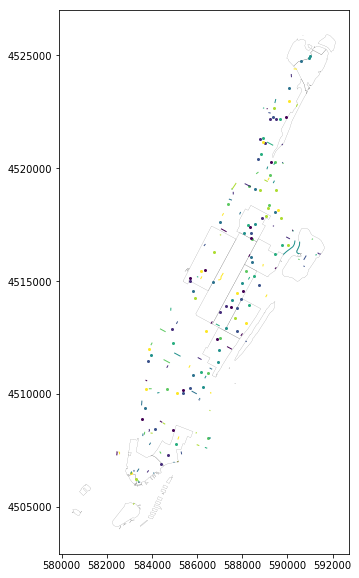

In [19]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
villagesdf.sample(10).plot(ax=ax, color="white", linewidth=.1)
trees.sample(100).plot(ax=ax)
streets.sample(100).plot(ax=ax)

## let's aggregate the number of trees by neighbourhoods

### .. to be continued 